In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import TileDataset
from models import TileMLP

2023-11-12 21:34:16.365287: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 21:34:16.367122: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 21:34:16.391270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 21:34:16.391293: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 21:34:16.391309: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
batch_size = 600
batch_per_file_size = 20
dataset = TileDataset(
    batch_size=batch_size,
    batch_per_file_size=batch_per_file_size,
    build_tfrecords=False)

In [3]:
mlp = TileMLP(
    batch_size, 
    learning_rate=2e-4, 
    batch_per_file_size=batch_per_file_size)

In [4]:
mlp.train(dataset, None)

iteration 500 training loss 7.0528827 lr 0.00002
iteration 1000 training loss 5.3272533 lr 0.00004
iteration 1500 training loss 4.7848086 lr 0.00006
iteration 2000 training loss 4.619664 lr 0.00008
iteration 2500 training loss 4.301289 lr 0.00010
iteration 3000 training loss 4.13739 lr 0.00012
iteration 3500 training loss 4.084843 lr 0.00014
iteration 4000 training loss 4.056506 lr 0.00016
iteration 4500 training loss 3.6564462 lr 0.00018
iteration 5000 training loss 4.0729437 lr 0.00020
iteration 5500 training loss 4.112388 lr 0.00020
iteration 6000 training loss 3.2272086 lr 0.00020
iteration 6500 training loss 3.5882015 lr 0.00020
iteration 7000 training loss 3.9960861 lr 0.00020
iteration 7500 training loss 4.1621847 lr 0.00020
iteration 8000 training loss 3.7513363 lr 0.00020
iteration 8500 training loss 3.7492146 lr 0.00020
iteration 9000 training loss 3.8624475 lr 0.00020
iteration 9500 training loss 3.935278 lr 0.00020
iteration 10000 training loss 4.2473817 lr 0.00020
epoch 7,

## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [6]:
val_df[['prediction', 'target']].describe()

,prediction,target
count,1.042735e+06,1.042735e+06
mean,-6.207111e-01,1.267942e+00
std,4.208761e+00,7.997063e-01
min,-1.421040e+01,-4.157284e-01
25%,-3.696938e+00,6.690614e-01
50%,-1.297825e+00,1.165585e+00
75%,1.818918e+00,1.747577e+00
max,2.433005e+01,7.079467e+00


In [7]:
val_df

,ID,config_index,prediction,target
0,b'tile:xla:tf2_bert_pretrain_dynamic_batch_siz...,5,8.813905,1.127151
1,b'tile:xla:resnet50.4x4.fp16_88b94c120f93739',322,-1.875998,1.212655
2,b'tile:xla:inception_v3_batch_128_train_68084c...,190,7.596079,1.082673
3,b'tile:xla:mlperf_bert_batch_24_2x2_eff7cdc303...,1706,-3.119697,1.006108
4,b'tile:xla:resnet50.4x4.fp16_-7d1bf437ab3cc27a',1278,7.917284,1.327317
...,...,...,...,...
1042730,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,3599,0.293389,2.539288
1042731,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,176,-5.775430,1.698893
1042732,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,1567,-5.832997,1.215034
1042733,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,1253,-0.251119,2.424030


In [8]:
val_df.groupby('ID').count().describe()

,config_index,prediction,target
count,676.000000,676.000000,676.000000
mean,1542.507396,1542.507396,1542.507396
std,2271.963138,2271.963138,2271.963138
min,4.000000,4.000000,4.000000
25%,130.000000,130.000000,130.000000
50%,603.500000,603.500000,603.500000
75%,1893.000000,1893.000000,1893.000000
max,9997.000000,9997.000000,9997.000000


Text(0, 0.5, 'prediction')

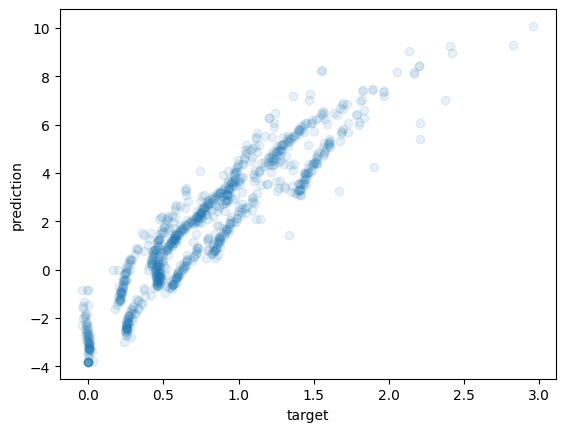

In [9]:
x_lin = np.linspace(0, 3, 100)
#plt.plot(x_lin, x_lin, color='orange')

#random_sample = val_df.sample(1000)
random_id = np.random.choice(val_df['ID'].unique())
random_sample = val_df[val_df['ID'] == random_id]

plt.scatter(
    random_sample.target,
    random_sample.prediction,
    alpha=0.1
)
plt.xlabel('target')
plt.ylabel('prediction')

Text(0, 0.5, 'squared error')

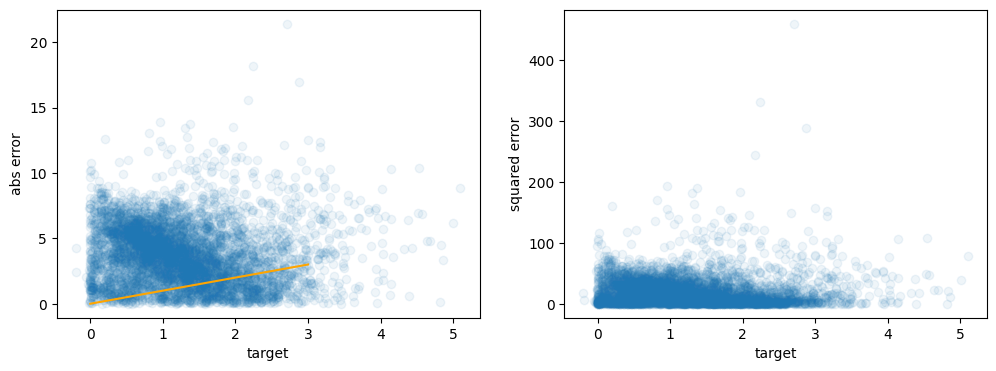

In [10]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 3, 100)
plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [11]:
def compute_best_5(df):
    top = df.sort_values('prediction').iloc[:5]
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [12]:
val_prediction = val_df.groupby('ID').apply(compute_best_5)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
tile:xla:bert_pretraining.4x4.fp16_-18321ad156c55c0b          423;82;252;843;846
tile:xla:bert_pretraining.4x4.fp16_-1972c148bcabec74         200;308;236;186;327
tile:xla:bert_pretraining.4x4.fp16_-1a91e1daf560d9c7              66;32;15;82;13
tile:xla:bert_pretraining.4x4.fp16_-1c6db741e059e66c                34;0;19;27;7
tile:xla:bert_pretraining.4x4.fp16_-2687e894772f7802        1142;654;978;817;327
                                                                  ...           
tile:xla:unet_3d.4x4.bf16_-563d7c5458dedfa9                  537;157;641;631;999
tile:xla:unet_3d.4x4.bf16_-66d55ea6ab9f0635                   78;371;354;275;297
tile:xla:unet_3d.4x4.bf16_128e1e63e17596dc              4277;6601;1566;8603;3989
tile:xla:unet_3d.4x4.bf16_2c26a09dea860431              5514;3822;5672;4179;3460
tile:xla:unet_3d.4x4.bf16_ffc12c104f9925                       801;0;921;379;266
Length: 676, dtype: object

In [ ]:
def tile_score(candidate_configs, tile_dict):
    config_scores = tile_dict['config_runtime'] / tile_dict['config_runtime_normalizers']
    best_runtime = np.min(config_scores)
    best_candidate_runtime = np.min(config_scores[candidate_configs])
    score = 2 - best_candidate_runtime / best_runtime
    return score

In [ ]:
tile_valid_dir = 'predict-ai-model-runtime/npz_all/npz/tile/xla/valid'

scores = []
tile_ids = []
for filename in os.listdir(tile_valid_dir):
    tile_id = 'tile:xla:' + filename.rstrip('.npz')
    tile_dict = dict(np.load(os.path.join(tile_valid_dir, filename)))
    n_configurations = len(tile_dict['config_runtime'])
    candidate_configs = val_prediction[tile_id]
    candidate_configs = [int(i) for i in candidate_configs.split(';')]
    score = tile_score(candidate_configs, tile_dict)
    scores.append(score)
    tile_ids.append(tile_id)

evaluation_result = pd.DataFrame(
    data=np.stack([tile_ids, scores], axis=-1),
    columns=['ID', 'score']
)
evaluation_result.sort_values('score')

In [ ]:
evaluation_result.sort_values('score').iloc[:30]

In [ ]:
evaluation_result['nn'] = evaluation_result['ID'].apply(lambda x: x.split(':')[2].replace('.', '_').split('_')[0])
evaluation_result['score'] = evaluation_result['score'].astype(float)

In [ ]:
evaluation_result[['score', 'nn']].groupby('nn').mean()

In [ ]:
evaluation_result['score'].mean()

## Inference over test set

In [13]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'tile:xla:d0a69155b6340748c36724e4bfc34be3',1016,0.774675
1,b'tile:xla:4fd0d8b264c6c65a4247cb0a0b93b1c2',249,0.811241
2,b'tile:xla:08bf844bda28efb17644fe3fb7fcc082',1487,7.649298
3,b'tile:xla:ce4b0c7efded102c8c9ba54ebd21d36a',1,30.536774
4,b'tile:xla:dc00f764d094bd1bd0311882c2d7a06e',8,3.977751
...,...,...,...
1420531,b'tile:xla:712775a7172527588e3c77af15c10591',5632,-1.022599
1420532,b'tile:xla:712775a7172527588e3c77af15c10591',3445,4.940535
1420533,b'tile:xla:712775a7172527588e3c77af15c10591',2192,0.675142
1420534,b'tile:xla:712775a7172527588e3c77af15c10591',7198,1.603674


In [14]:
test_prediction = test_df.groupby('ID').apply(compute_best_5)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
tile:xla:0023795810403f8b0b244d88c901322f    3878;2536;1511;2367;3553
tile:xla:005c91ca7a50fffc663678fd44316f04         498;502;376;288;208
tile:xla:0070642211d5a98a16b94f4d7df229fe         970;254;711;626;577
tile:xla:008191e0c67a6e7a62cde1a3e1d66795         701;444;62;424;1077
tile:xla:008730b43f100be7c2800d7cb89578a4         473;336;390;606;729
                                                       ...           
tile:xla:fe52756188d770ee661f69dcd2688142      7684;5360;259;2543;729
tile:xla:fe91ecfc5176e4dea4cec619beb19aeb         168;147;163;101;175
tile:xla:ff9a30ba54b97a48b9f5370a9b1e8cb6             106;33;36;21;72
tile:xla:ffa452493cbec7e4d2fee040879f98ae      1271;778;714;1156;1320
tile:xla:ffbfd532de0a28c79f4740753fd78006          71;141;122;150;118
Length: 844, dtype: object

In [15]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/tile_test_prediction_11_12_22_22.csv')

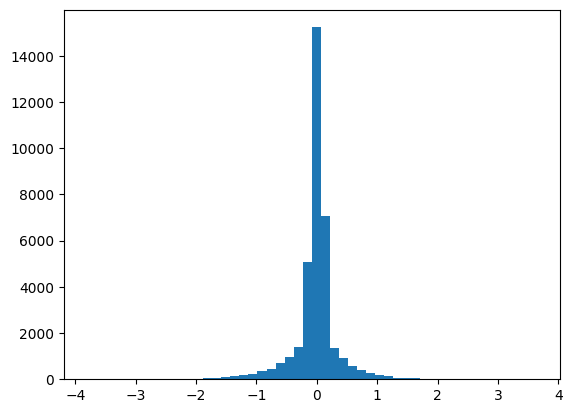

In [16]:
plt.hist(mlp.dense_layer_1.kernel.numpy().flatten(), bins=50);